Import libraries

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read dataset

In [149]:
df = pd.read_csv("data\saudi-pro-league-transfers.csv")

In [150]:
df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country
0,Al-Hilal SFC,Khaled Aziz,18.0,Defensive Midfield,Unknown,?,in,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia
1,Al-Hilal SFC,Sami Al-Jaber,27.0,Centre-Forward,Wolves,loan transfer,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.0,Right Winger,Al-Nassr,-,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia
3,Al-Hilal SFC,Saleh Al-Salloumi,37.0,Goalkeeper,Retired,-,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia
4,Al-Hilal SFC,Elijah Litana,29.0,Centre-Back,Retired,-,out,Summer,NaN,Saudi Professional League,2000,2000/2001,Saudi Arabia


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7858 entries, 0 to 7857
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           7858 non-null   object 
 1   player_name         7858 non-null   object 
 2   age                 7755 non-null   float64
 3   position            7858 non-null   object 
 4   club_involved_name  7858 non-null   object 
 5   fee                 7844 non-null   object 
 6   transfer_movement   7858 non-null   object 
 7   transfer_period     7858 non-null   object 
 8   fee_cleaned         2374 non-null   float64
 9   league_name         7858 non-null   object 
 10  year                7858 non-null   int64  
 11  season              7858 non-null   object 
 12  country             7858 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 798.2+ KB


# Column Cleaning

### Club Name

Verify that there are no misspelled and repeated club names

In [152]:
team_list = df['club_name'].unique().tolist()

In [153]:
team_list.sort()

In [154]:
print(team_list)

['Abha Club', 'Al-Adalah FC', 'Al-Ahli SFC', 'Al-Ain FC', 'Al-Ansar', 'Al-Batin FC', 'Al-Ettifaq FC', 'Al-Faisaly FC', 'Al-Fateh SC', 'Al-Fayha FC', 'Al-Hazem SC', 'Al-Hilal SFC', 'Al-Nahdah FC', 'Al-Nassr FC', 'Al-Okhdood Club', 'Al-Orobah FC', 'Al-Qadsiah FC', 'Al-Raed SFC', 'Al-Riyadh SC', 'Al-Shabab FC', 'Al-Shoalah FC', 'Al-Taawoun FC', 'Al-Tai FC', 'Al-Watani', 'Al-Wehda FC', 'Damac FC', 'Hajer Club', 'Ittihad Club', 'Khaleej FC', 'Najran SC', 'Ohod Club']


In [155]:
len(df['club_name'].unique().tolist())

31

In [156]:
#df['club_name'] = df['club_name'].apply(str.lower)

### Player Name

Verify that player names, amount, and that these are correct.

In [157]:
player_list = df['player_name'].unique().tolist()

In [158]:
len(player_list)

2442

In [159]:
player_list.sort()
print(player_list)

['Aaron Boupendza', 'Abbas Al-Hassan', 'Abbas Shengeeti', 'Abdalaziz Al-Bhrany', 'Abdalellah Hawsawi', 'Abdallah Deeb', 'Abdallah Medwah', 'Abdallah Said', 'Abdalrazaq Hossin', 'Abdel Fadel Suanon', 'Abdelali Mhamdi', 'Abdelatif Al-Bahdari', 'Abdelaziz Ali Guechi', 'Abdelfatha Safi', 'Abdelfattah Safi', 'Abdelilah Hafidi', 'Abdelkader Bedrane', 'Abdelkader Oueslati', 'Abdelkarim Benhania', 'Abdelkarim Nafti', 'Abdellatif Jrindou', 'Abdelmalek Ziaya', 'Abdelmoumene Djabou', 'Abderrazak Hamdallah', 'Abdessamad Ouarrad', 'Abdo Al-Basisi', 'Abdoh Bernaoy', 'Abdoh Hakami', 'Abdoh Otayf', 'Abdoulaye Koffi', 'Abdoulaye Sané', 'Abduallah Al-Dosari', 'Abdul Aziz Al-Muqbali', 'Abdul Sallam Amur', 'Abdulah Al Mutairi', 'Abdulah Al-Bilady', 'Abdulah Al-Mutairi', 'Abdulah Awaji', 'Abdularahman Al-Hurib', 'Abdulaziz Abushqra', 'Abdulaziz Al Mohammad', 'Abdulaziz Al-Abduassalam', 'Abdulaziz Al-Alawi', 'Abdulaziz Al-Aryani', 'Abdulaziz Al-Azemi', 'Abdulaziz Al-Bishi', 'Abdulaziz Al-Dawsari', 'Abdulazi

In [160]:
#df['player_name'] = df['player_name'].apply(str.lower)

### Age

Fill nulls with the median so as not to alter the distribution and convert age to int type

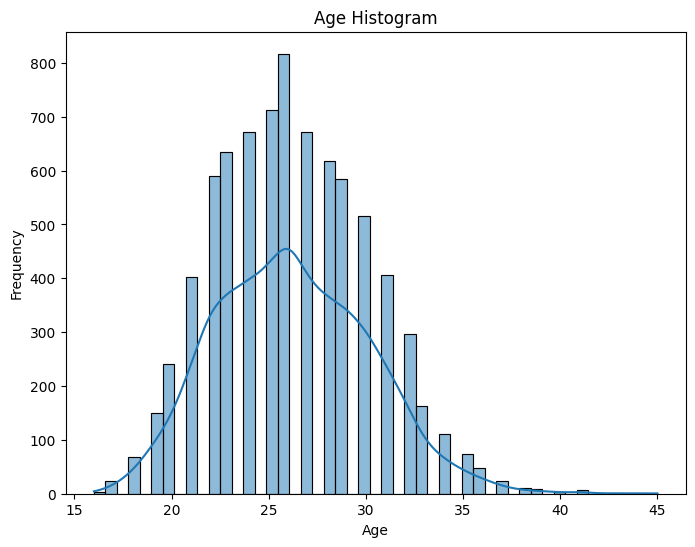

In [214]:
# Histogram
plt.figure(figsize=(8, 6)) 
sns.histplot(data=df, x='age', kde=True)  
plt.title('Age Histogram') 
plt.xlabel('Age')  
plt.ylabel('Frequency') 
plt.show() 

In [162]:
median = df['age'].median()
print(median)

26.0


In [163]:
df['age'] = df['age'].fillna(median)

In [164]:
df['age'].head()

0    18.0
1    27.0
2    26.0
3    37.0
4    29.0
Name: age, dtype: float64

In [165]:
df['age'] = df['age'].apply(int)

### Position

Change the name of the "Position" column to "Specific Position". The content of Position will be the 4 most important and general positions on the playing field. The information is obtained from the original column.

In [166]:
df['position'].unique()

array(['Defensive Midfield', 'Centre-Forward', 'Right Winger',
       'Goalkeeper', 'Centre-Back', 'Attacking Midfield', 'Left Midfield',
       'Left Winger', 'Attack', 'Right Midfield', 'Midfield',
       'Central Midfield', 'Right-Back', 'Second Striker', 'Sweeper',
       'Defence', 'Left-Back'], dtype=object)

In [167]:
df['specific_position'] = df['position']

In [168]:
df['position'] = df['position'].replace('Defensive Midfield', 'Midfield')
df['position'] = df['position'].replace('Centre-Forward', 'Forward')
df['position'] = df['position'].replace('Right Winger', 'Forward')
df['position'] = df['position'].replace('Centre-Back', 'Defence')

In [169]:
df['position'] = df['position'].replace('Attacking Midfield', 'Midfield')
df['position'] = df['position'].replace('Left Midfield', 'Midfield')
df['position'] = df['position'].replace('Left Winger', 'Forward')
df['position'] = df['position'].replace('Attack', 'Forward')
df['position'] = df['position'].replace('Right Midfield', 'Midfield')
df['position'] = df['position'].replace('Central Midfield', 'Midfield')
df['position'] = df['position'].replace('Right-Back', 'Defence')
df['position'] = df['position'].replace('Second Striker', 'Forward')
df['position'] = df['position'].replace('Sweeper', 'Defence')
df['position'] = df['position'].replace('Left-Back', 'Defence')

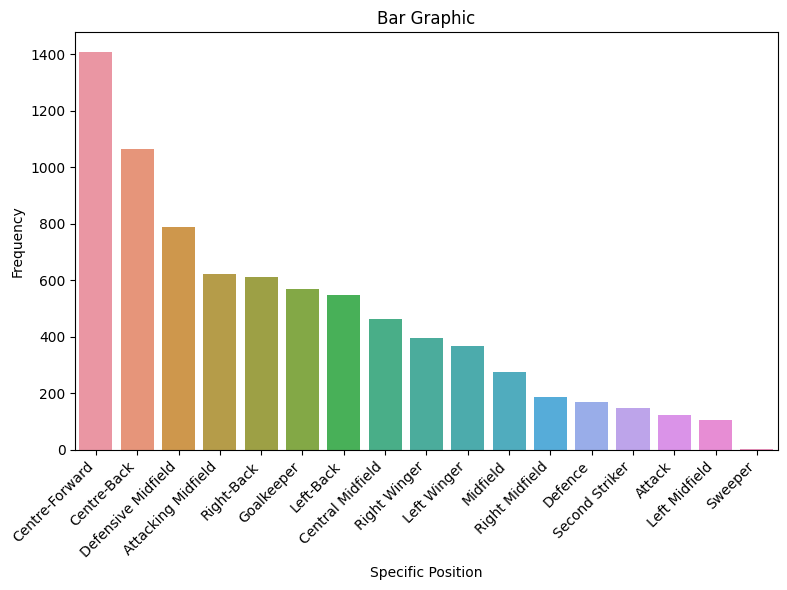

In [213]:
# Bar Graphic "Specific Position"
frecuencia = df["specific_position"].value_counts()
plt.figure(figsize=(8, 6)) 
ax = sns.barplot(x=frecuencia.index, y=frecuencia.values)  
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Bar Graphic')  
plt.xlabel('Specific Position')  
plt.ylabel('Frequency') 
plt.tight_layout()
plt.show()

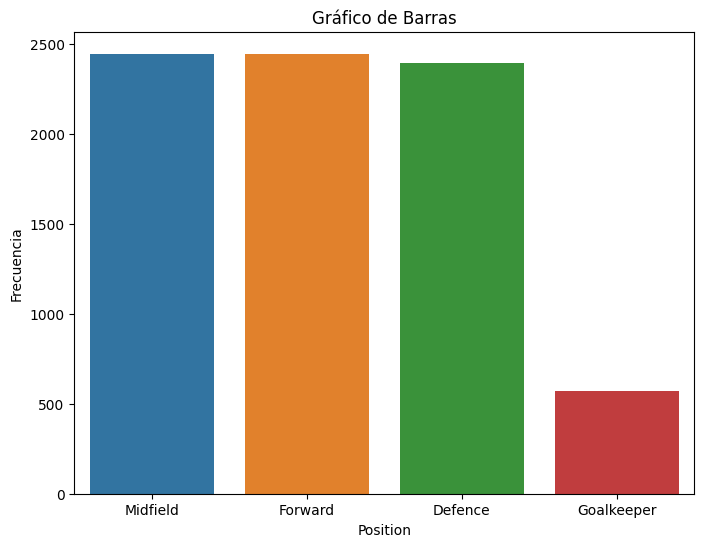

In [171]:
# Bar Graphic "Position"
frecuencia = df["position"].value_counts()
plt.figure(figsize=(8, 6)) 
sns.barplot(x=frecuencia.index, y=frecuencia.values)  
plt.title('Bar Graphic')  
plt.xlabel('Position')  
plt.ylabel('Frequency')  
plt.show() 

### Club Involved

Identify, correct and unify club names. If it is misspelled, or is a variant of the same club, it is unified in a single name. This increases the quality of the data, allowing a more accurate and representative analysis.

In [172]:
club_mapping = {
    'Al-Ahli': 'Al-Ahli SC',
    'Abha': 'Abha Club',
    'Al-Batin': 'Al-Batin',
    'Al-Ettifaq': 'Al-Ettifaq',
    'Al-Faisaly U23': 'Al-Faisaly FC',
    'Al-Fateh': 'Al-Fateh',
    'Al-Fayha': 'Al-Fayha FC',
    'Al-Gharafa': 'Al-Gharafa SC',
    'Al-Hilal': 'Al-Hilal FC',
    'Al-Jazeera Club': 'Al-Jazira Sporting Club',
    'Al-Jazira': 'Al-Jazira Sporting Club',
    'Al-Nassr': 'Al-Nasr SC',
    'Al-Nasr': 'Al-Nasr SC',
    'Al-Qadsiah': 'Al-Qadsiah FC',
    'Al-Raed': 'Al-Raed',
    'Al-Riyadh': 'Al-Riyadh SC',
    'Al-Shaab': 'Al-Shabab SC',
    'Al-Shabab': 'Al-Shabab SC',
    'Al-Shoalah U23': 'Al-Shoalah',
    'Al-Taawoun': 'Al-Taawoun',
    'Al-Tai': 'Al-Tai',
    'Al-Wehda': 'Al-Wehda',
    'Damac': 'Damac FC',
    'Ittihad C. U23': 'Ittihad Club'
}

# Function to apply partial match replacemen
def replace_club_name(name):
    for key in club_mapping.keys():
        if key in name:
            return club_mapping[key]
    return name

df['club_involved_name'] = df['club_involved_name'].apply(replace_club_name)


In [173]:
club_involved_list = df['club_involved_name'].unique().tolist()
club_involved_list.sort()
print(club_involved_list)

["1.FC K'lautern", '1.FSV Mainz 05', '3 de Febrero', 'A. Baghdad SC', 'ABC FC', 'AC Ajaccio', 'AC Bellinzona', 'AC Milan', 'AC Tripoli', 'ACS Poli', 'ACSM Poli Iasi', 'ADI Metapán', 'AE Kifisias', 'AEK Athens', 'AFAD Djékanou', 'AFC Eskilstuna', 'AIK', 'AJ Auxerre', 'AO Xanthi', 'AOK Kerkyra', 'APOEL Nicosia', 'AS Gabès', 'AS Livorno', 'AS Lyon-Duchère', 'AS Marsa', 'AS Nancy', 'AS Roma', 'AS Saint-Priest', 'AS Vita Club', 'ASA', 'ASC Yakaar', 'ATK Mohun Bagan', 'Aalborg BK', 'Aarhus GF', 'Abha Club', 'Adana Demirspor', 'Adelaide United', 'Africa Sports', 'Ajax', 'Ajax Cape Town', 'Ajman Club', 'Akhmat Grozny', 'Aktobe', 'Al-Adalah', 'Al-Ahed', 'Al-Ahli SC', 'Al-Ain FC', 'Al-Ansar', 'Al-Anwar Club', 'Al-Arabi Irbid', 'Al-Arabi SC', 'Al-Batin', 'Al-Bukiryah FC', 'Al-Dhafra FC', 'Al-Dhaid', 'Al-Diraiyah FC', 'Al-Ettifaq', 'Al-Faisaly FC', 'Al-Faisaly SC', 'Al-Fateh', 'Al-Fayha FC', 'Al-Gharafa SC', 'Al-Hamriyah', 'Al-Hazem', 'Al-Hilal FC', 'Al-Hussein SC', 'Al-Ittifaq FC', 'Al-Jabalain',

In [174]:
len(club_involved_list)

935

### Fee


Fill in nulls, replace missing values ​​and create the new column "type_operation"

In [175]:
fee_list = df['fee'].unique().tolist()
print(fee_list)

['?', 'loan transfer', '-', '€2.00m', 'free transfer', 'End of loanJun 30, 2000', 'End of loanJan 30, 2001', 'Loan fee:€19k', '€50k', 'End of loanDec 31, 2000', 'End of loanJun 30, 2001', 'End of loanDec 31, 2001', 'End of loanMay 1, 2003', '€170k', '€1.10m', 'End of loanJun 30, 2003', '€500k', 'End of loanAug 1, 2003', 'End of loanJun 22, 2003', 'End of loanJun 30, 2004', '€400k', 'Loan fee:€150k', 'End of loanDec 1, 2004', 'End of loanMar 30, 2005', '€6.00m', 'End of loanMay 1, 2006', '€4.50m', 'End of loanJul 1, 2005', '€250k', 'End of loanJun 30, 2005', '€1.00m', 'Loan fee:€700k', 'End of loanDec 1, 2005', '€75k', 'End of loanJun 30, 2006', '€160k', '€2.50m', 'End of loanJun 1, 2006', '€1.20m', 'Loan fee:€200k', 'End of loanDec 31, 2006', 'End of loanApr 1, 2007', '€600k', 'End of loanDec 1, 2006', '€9.00m', '€200k', 'End of loanJun 30, 2007', 'End of loanJun 1, 2007', '€2.57m', '€732k', 'End of loanMay 1, 2008', '€900k', 'End of loanDec 1, 2007', 'End of loanMar 1, 2008', 'End of 

In [176]:
df['fee'] = df['fee'].fillna('-')

In [177]:
df[df['fee']=="-"].shape[0]

952

In [178]:
df[df['fee']=="?"].shape[0]

2416

In [179]:
df['fee'] = df['fee'].replace('?','-')

In [180]:
# Check if 'Retired' is in the 'club_involved_name' column and update the 'type_operation' and 'fee' columns
df.loc[df['club_involved_name'] == 'Retired', ['type_operation', 'fee']] = ['retired', 'retired']

In [181]:
df['fee'] = df['fee'].apply(str.lower)

In [182]:
def get_type_operation(value):
    if 'loan' in value:
        return "loan"
    elif '€' in value:
        return "transfer"
    elif 'free' in value:
        return "free"
    elif 'retired' in value:
        return "retired"
    else:
        return "-"

In [183]:
df['type_operation'] = df['fee'].apply(get_type_operation)

In [184]:
df['type_operation'].unique().tolist()

['-', 'loan', 'retired', 'transfer', 'free']

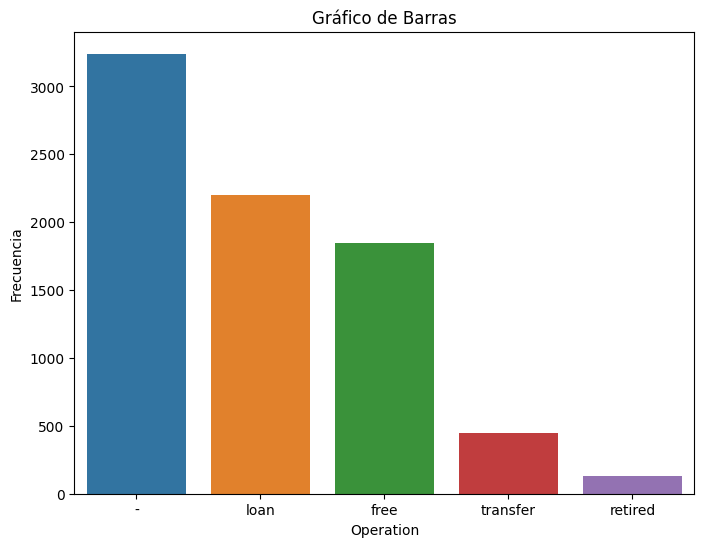

In [185]:
# Graphic Bar "Type of Operation"
frecuencia = df["type_operation"].value_counts()
plt.figure(figsize=(8, 6)) 
sns.barplot(x=frecuencia.index, y=frecuencia.values)  
plt.title('Graphic Bar')  
plt.xlabel('Operation') 
plt.ylabel('Frequency')  
plt.show() 

### Fee Cleaned

Plot, standardize values, replace unknowns by the median, and fill in nulls

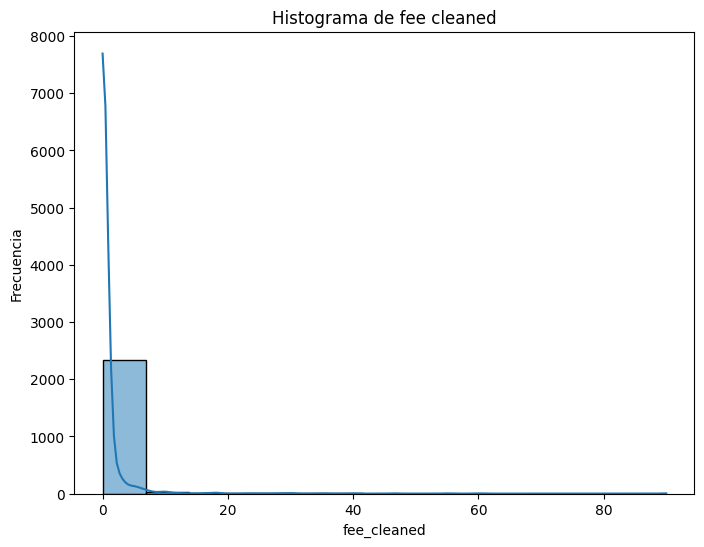

In [186]:
# Fee Cleaned Histogram
plt.figure(figsize=(8, 6)) 
sns.histplot(data=df, x='fee_cleaned', kde=True)  
plt.title('Fee cleaned histogram')  
plt.xlabel('fee_cleaned')  
plt.ylabel('Frequency')  
plt.show()  

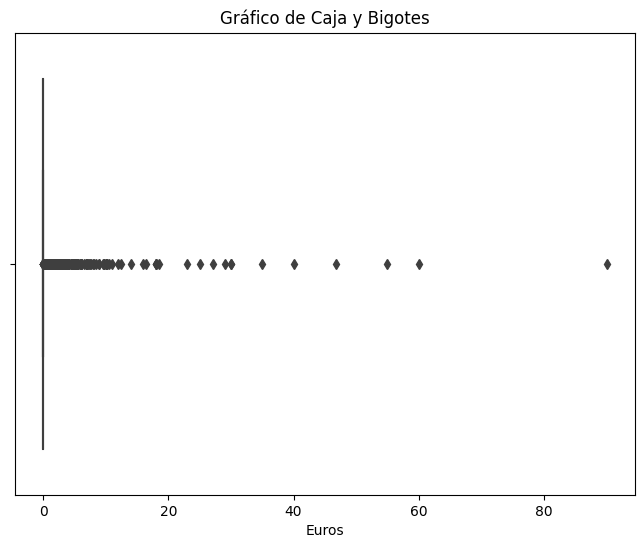

In [187]:
# Box and whisker plot
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=df['fee_cleaned'])  
plt.title('Box and whisker plot')  
plt.xlabel('Euros')  
#plt.xlim(0, 100000000)  # Axis X limit
plt.show()  

In [188]:
df['fee_cleaned'] = df['fee_cleaned']*1000000

In [189]:
mean = df['fee_cleaned'][df['type_operation']=='transfer'].mean()
median_transfer = df['fee_cleaned'][df['type_operation']=='transfer'].median()
mode = df['fee_cleaned'][df['type_operation']=='transfer'].mode()
print('Media: ', mean)
print('Mediana: ', median)
print('Moda: ', mode)

Media:  3356959.6412556055
Mediana:  26.0
Moda:  0    1000000.0
Name: fee_cleaned, dtype: float64


In [190]:
def get_median_transfer(row):
    if row['type_operation'] == '-':
        return median_transfer
    else:
        return row['fee_cleaned']

In [192]:
df['fee_cleaned'] = df.apply(get_median_transfer, axis=1)

In [193]:
df['fee'] = df['fee'].replace('-', 'transfer')

In [194]:
df['type_operation'] = df['type_operation'].replace('-', 'transfer')

In [195]:
df['fee_cleaned'] = df['fee_cleaned'].fillna(0)

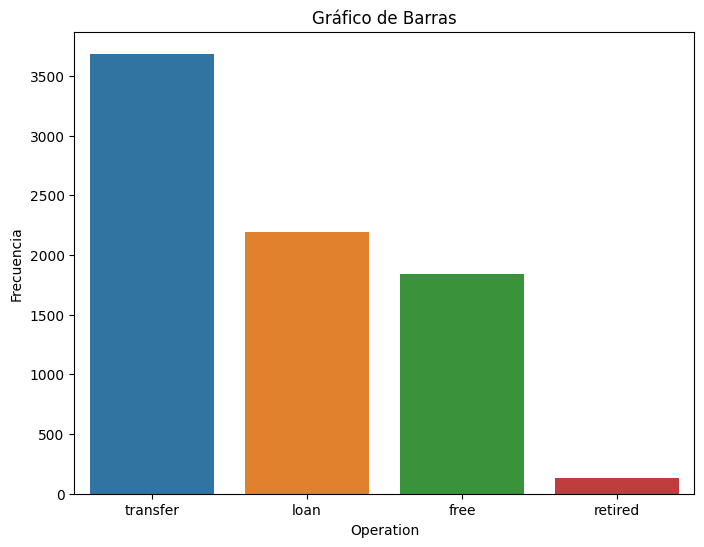

In [196]:
# Operation Bar Plot
frecuencia = df["type_operation"].value_counts()
plt.figure(figsize=(8, 6))  
sns.barplot(x=frecuencia.index, y=frecuencia.values)  
plt.title('Bar Plot')  
plt.xlabel('Operation')  
plt.ylabel('Frequency')  
plt.show()  

### Transfer Movement

In [197]:
df['transfer_movement'].unique()

array(['in', 'out'], dtype=object)

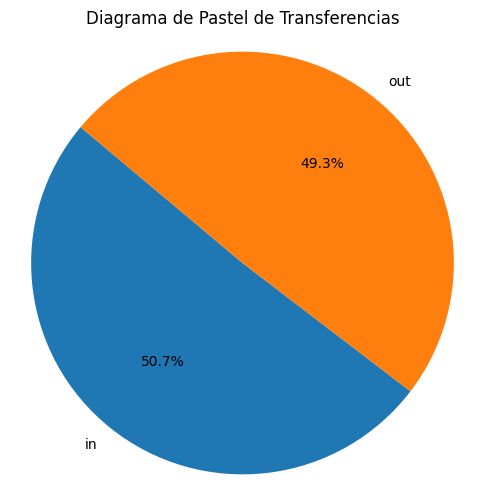

In [198]:
conteo = df['transfer_movement'].value_counts()

# Pie diagram
plt.figure(figsize=(6, 6)) 
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=140)  

plt.title('Diagrama de Pastel de Transferencias')  

plt.axis('equal') 
plt.show()

### Transfer Period

In [199]:
df['transfer_period'].unique()

array(['Summer', 'Winter'], dtype=object)

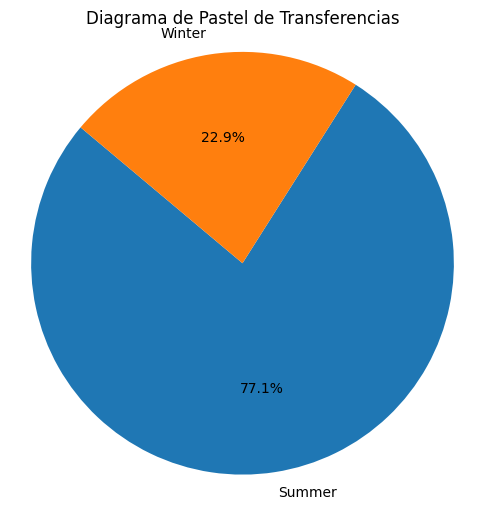

In [200]:
conteo = df['transfer_period'].value_counts()

# Pie diagram
plt.figure(figsize=(6, 6))  
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=140)  # Crear el diagrama de pastel

plt.title('Diagrama de Pastel de Transferencias')  

plt.axis('equal')  
plt.show()

### League name

In [201]:
df['league_name'].unique()

array(['Saudi Professional League'], dtype=object)

Remove the column because it contains a single value

In [202]:
df = df.drop('league_name', axis=1)

#### Year

In [203]:
df['year'] = df['year'].apply(str)

In [204]:
df['year'].unique()

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024'], dtype=object)

### Season

In [205]:
df['season']

0       2000/2001
1       2000/2001
2       2000/2001
3       2000/2001
4       2000/2001
          ...    
7853    2024/2025
7854    2024/2025
7855    2024/2025
7856    2024/2025
7857    2024/2025
Name: season, Length: 7858, dtype: object

### Country

In [206]:
df['country'].unique()

array(['Saudi Arabia'], dtype=object)

Remove the column because it contains a single value

In [207]:
df = df.drop('country', axis=1)

## Details

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7858 entries, 0 to 7857
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           7858 non-null   object 
 1   player_name         7858 non-null   object 
 2   age                 7858 non-null   int64  
 3   position            7858 non-null   object 
 4   club_involved_name  7858 non-null   object 
 5   fee                 7858 non-null   object 
 6   transfer_movement   7858 non-null   object 
 7   transfer_period     7858 non-null   object 
 8   fee_cleaned         7858 non-null   float64
 9   year                7858 non-null   object 
 10  season              7858 non-null   object 
 11  specific_position   7858 non-null   object 
 12  type_operation      7858 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 798.2+ KB


Sort columns

In [209]:
column_order = ["club_name", "player_name", "age", "position", "specific_position", "club_involved_name", "fee", "type_operation", "fee_cleaned", "year", "season"]    
df = df[column_order]

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7858 entries, 0 to 7857
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   club_name           7858 non-null   object 
 1   player_name         7858 non-null   object 
 2   age                 7858 non-null   int64  
 3   position            7858 non-null   object 
 4   specific_position   7858 non-null   object 
 5   club_involved_name  7858 non-null   object 
 6   fee                 7858 non-null   object 
 7   type_operation      7858 non-null   object 
 8   fee_cleaned         7858 non-null   float64
 9   year                7858 non-null   object 
 10  season              7858 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 675.4+ KB


CSV Export

In [216]:
df.to_csv('clean_data/clean_saudi-pro-league-transfers.csv', index=False)